In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
btc_data = pd.read_csv('btc_1h_data_with_ma.csv')

In [40]:
ma_candidates = [10, 20, 30, 50, 60, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 200]

In [52]:
# Function to backtest strategy and calculate cumulative profit
def backtest_and_calculate_profit(df, ma):
    df['Position'] = np.where(df['close'] > df[f'MA_{ma}'], 1, 0)  # 1 for buy, 0 for sell
    df['Signal'] = df['Position'].diff()  # Buy signal when diff > 0, sell signal when diff < 0

    # Initial values
    initial_cash = 10000  # Starting with $10,000
    btc_holding = 0
    cash = initial_cash
    purchase_price = 0
    stop_loss = 0 # No stop loss    
    
    # stop_loss = 0.995 # 0.5% loss
    # stop_loss = 0.99 # 1% loss
    # stop_loss = 0.98 # 2% loss
    # stop_loss = 0.97 # 3% loss

    for i in range(0, len(df)):
        price = df['close'].iloc[i]
        # Stop loss check: Sell if the price drops more than 1% below the purchase price
        if btc_holding > 0 and price < purchase_price * stop_loss:
            cash = btc_holding * price  # Sell all BTC and hold cash
            btc_holding = 0  # No BTC left after selling
            current_time = df['timestamp'].iloc[i]
            print(f"{current_time}: Stop loss triggered! Sold BTC at {price:.2f}, now holding {cash:.2f} USDT")

        else:
            # Buy signal
            if df['Signal'].iloc[i] == 1:  # Crosses above MA
                if cash > 0:
                    btc_holding = cash / price  # Buy BTC with all available cash
                    cash = 0  # No cash left after buying
                    purchase_price = price
                    current_time = df['timestamp'].iloc[i]
                    print(f"{current_time}: Bought BTC at {price:.2f}, holding {btc_holding:.4f} BTC")


            # Sell signal
            elif df['Signal'].iloc[i] == -1:  # Crosses below MA
                if btc_holding > 0:
                    cash = btc_holding * price  # Sell all BTC and hold cash
                    btc_holding = 0  # No BTC left after selling
                    current_time = df['timestamp'].iloc[i]
                    print(f"{current_time}: Sold BTC at {price:.2f}, now holding {cash:.2f} USDT\n")
        
        # Calculate current portfolio value (cash + value of BTC)
        portfolio_value = cash + (btc_holding * price)
        # Update the portfolio value for each iteration
        df.loc[i, 'portfolio_value'] = portfolio_value

    # df['portfolio_value'] = portfolio_value
    print(f"Final value for MA {ma}: {portfolio_value:,.2f} USDT")
    return df

In [53]:
# Filter btc_data for the year 2018 and 2022
btc_data = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2018, 2022])]
btc_data = btc_data.drop(btc_data[~pd.to_datetime(btc_data['timestamp']).dt.year.isin([2018, 2022])].index)


In [54]:
btc_data.tail()

,timestamp,open,high,low,close,volume,MA_10,MA_20,MA_30,MA_50,...,MA_100,MA_110,MA_120,MA_130,MA_140,MA_150,MA_160,MA_170,MA_180,MA_200
47023,2022-12-31 19:00:00,16577.78,16590.06,16565.10,16570.14,4044.43359,16581.644,16569.7080,16567.757667,16562.0514,...,16592.4392,16613.745091,16635.412417,16651.007308,16665.851071,16675.220200,16684.591250,16693.384706,16701.042833,16713.15350
47024,2022-12-31 20:00:00,16570.14,16574.97,16564.09,16568.60,2622.14355,16581.901,16569.1220,16568.202333,16561.1754,...,16591.3282,16611.012455,16633.205917,16648.734692,16663.795643,16673.723600,16682.946625,16691.767118,16699.587167,16711.78770
47025,2022-12-31 21:00:00,16568.19,16571.64,16544.12,16548.28,3618.77389,16580.014,16568.1240,16568.283000,16560.1562,...,16590.4464,16608.276636,16630.785750,16646.345077,16661.357000,16671.939067,16681.186625,16690.048176,16698.028778,16710.58035
47026,2022-12-31 22:00:00,16548.28,16567.49,16470.00,16520.81,6695.13625,16574.551,16565.3675,16567.872667,16558.5816,...,16588.7470,16605.039000,16627.464250,16643.904154,16658.690000,16670.102133,16679.304375,16688.264882,16696.342111,16709.02360
47027,2022-12-31 23:00:00,16520.28,16551.24,16487.74,16542.40,4973.43307,16568.702,16564.8645,16567.093667,16557.0384,...,16587.5064,16602.158545,16624.731000,16641.669538,16656.298929,16668.521667,16677.505500,16686.597529,16694.792944,16707.59815


In [30]:

profit_df = backtest_and_calculate_profit(btc_data, 100)
# print(profit_df['Cumulative Profit'])

2018-01-01 06:00:00: Bought BTC at 13780.41, holding 0.7257 BTC
2018-01-01 07:00:00: Sold BTC at 13570.35, now holding 9847.57 USDT

2018-01-01 09:00:00: Bought BTC at 13616.99, holding 0.7232 BTC
2018-01-01 10:00:00: Sold BTC at 13570.01, now holding 9813.59 USDT

2018-01-02 00:00:00: Bought BTC at 13750.01, holding 0.7137 BTC
2018-01-02 03:00:00: Sold BTC at 13353.78, now holding 9530.80 USDT

2018-01-02 09:00:00: Bought BTC at 13452.00, holding 0.7085 BTC
2018-01-07 17:00:00: Sold BTC at 15800.01, now holding 11194.37 USDT

2018-01-07 18:00:00: Bought BTC at 16019.25, holding 0.6988 BTC
2018-01-08 01:00:00: Sold BTC at 15850.07, now holding 11076.15 USDT

2018-01-08 02:00:00: Bought BTC at 16037.38, holding 0.6906 BTC
2018-01-08 03:00:00: Sold BTC at 15670.37, now holding 10822.67 USDT

2018-01-13 01:00:00: Bought BTC at 14170.38, holding 0.7638 BTC
2018-01-13 04:00:00: Sold BTC at 14016.24, now holding 10704.95 USDT

2018-01-13 05:00:00: Bought BTC at 14130.00, holding 0.7576 BTC
2

In [43]:
portfolio_value_by_ma = {}

In [44]:
for ma in ma_candidates:
    profit = backtest_and_calculate_profit(btc_data, ma)
    portfolio_value_by_ma[ma] = profit['portfolio_value'].iloc[-1]

2018-01-01 06:00:00: Bought BTC at 13780.41, holding 0.7257 BTC
2018-01-01 08:00:00: Sold BTC at 13499.99, now holding 9796.51 USDT

2018-01-01 09:00:00: Bought BTC at 13616.99, holding 0.7194 BTC
2018-01-01 11:00:00: Sold BTC at 13220.56, now holding 9511.30 USDT

2018-01-01 19:00:00: Bought BTC at 13240.37, holding 0.7184 BTC
2018-01-02 03:00:00: Sold BTC at 13353.78, now holding 9592.77 USDT

2018-01-02 09:00:00: Bought BTC at 13452.00, holding 0.7131 BTC
2018-01-03 09:00:00: Sold BTC at 14519.99, now holding 10354.37 USDT

2018-01-03 13:00:00: Bought BTC at 14855.02, holding 0.6970 BTC
2018-01-03 14:00:00: Sold BTC at 14790.11, now holding 10309.12 USDT

2018-01-03 15:00:00: Bought BTC at 15033.77, holding 0.6857 BTC
2018-01-03 19:00:00: Sold BTC at 14700.01, now holding 10080.25 USDT

2018-01-03 20:00:00: Bought BTC at 14926.01, holding 0.6753 BTC
2018-01-03 22:00:00: Sold BTC at 14799.91, now holding 9995.09 USDT

2018-01-03 23:00:00: Bought BTC at 14919.51, holding 0.6699 BTC
20

In [46]:
for ma, value in portfolio_value_by_ma.items():
    print(f"Final value for MA {ma}: {value:,.2f} USDT") 

Final value for MA 10: 1,696.01 USDT
Final value for MA 20: nan USDT
Final value for MA 30: nan USDT
Final value for MA 50: nan USDT
Final value for MA 60: nan USDT
Final value for MA 90: nan USDT
Final value for MA 100: nan USDT
Final value for MA 110: nan USDT
Final value for MA 120: nan USDT
Final value for MA 130: nan USDT
Final value for MA 140: nan USDT
Final value for MA 150: nan USDT
Final value for MA 160: nan USDT
Final value for MA 170: nan USDT
Final value for MA 180: nan USDT
Final value for MA 200: nan USDT


In [46]:
# Find the MA with the highest portfolio value
best_ma = max(portfolio_value_by_ma, key=portfolio_value_by_ma.get)
best_value = portfolio_value_by_ma[best_ma]

print(f"The best performing MA is {best_ma} with a final portfolio value of {best_value:,.2f} USDT")


The best performing MA is 100 with a final portfolio value of 415,227.04 USDT


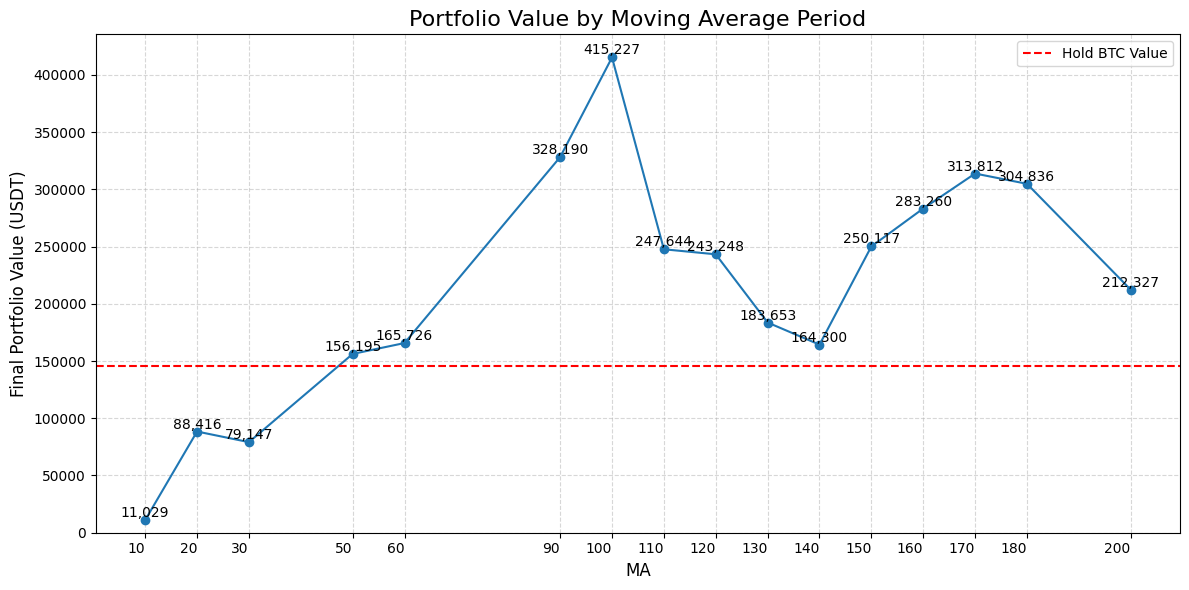

In [59]:
# Sort the dictionary by MA values
sorted_portfolio_value = dict(sorted(portfolio_value_by_ma.items()))

# Extract MA values and corresponding portfolio values
ma_values = list(sorted_portfolio_value.keys())
portfolio_values = list(sorted_portfolio_value.values())

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(ma_values, portfolio_values, marker='o')

# Customize the plot
plt.title('Portfolio Value by Moving Average Period', fontsize=16)
plt.xlabel('MA', fontsize=12)
plt.ylabel('Final Portfolio Value (USDT)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels on top of each point
for i, value in enumerate(portfolio_values):
    plt.text(ma_values[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Add x-axis labels for each MA value
plt.xticks(ma_values, [f'{ma}' for ma in ma_values], rotation=0, ha='right')

# Adjust the bottom margin to accommodate the labels
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at 145,580.15
plt.axhline(y=145580.15, color='red', linestyle='--', label='Hold BTC Value')
plt.legend()

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()


## Just holding BTC


In [57]:
# Function to calculate final value of holding BTC
def calculate_holding_value(df):
    initial_cash = 10000  # Start with $10,000 in cash

    # Buy BTC at the first available price
    initial_price = df['close'].iloc[0]
    btc_holding = initial_cash / initial_price  # Buy BTC with all available cash

    # Sell BTC at the last available price
    final_price = df['close'].iloc[-1]
    final_value = btc_holding * final_price  # Calculate the value of the BTC holding

    print(f"Initial BTC price: {initial_price:.2f} USDT")
    print(f"Final BTC price: {final_price:.2f} USDT")
    print(f"Final value of holding BTC: {final_value:,.2f} USDT")
    
    return final_value

In [58]:

# Example usage
# Assuming 'df' is a DataFrame with your historical price data (e.g., 1-hour BTC/USDT prices)
final_value = calculate_holding_value(btc_data)

Initial BTC price: 4308.83 USDT
Final BTC price: 62728.01 USDT
Final value of holding BTC: 145,580.15 USDT


## Portfolio cumulative profit

Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2263 ticks ([-3106.0, ..., 65744.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

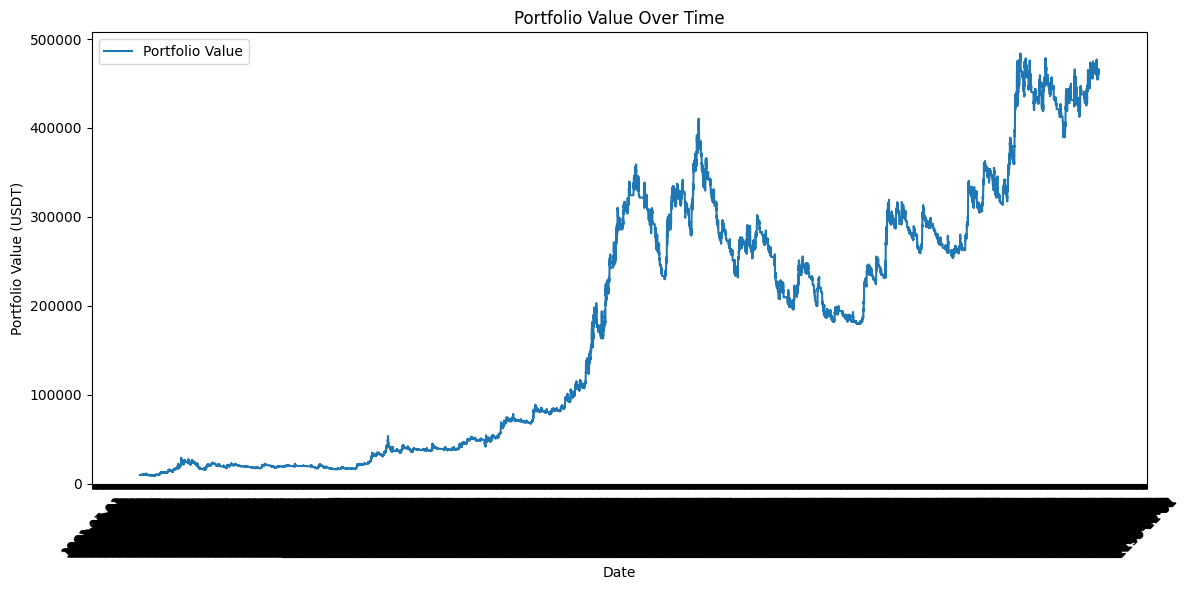

In [13]:
# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Import matplotlib.dates for date handling
import matplotlib.dates as mdates

# Plot the portfolio value over time
plt.plot(btc_data['timestamp'], btc_data['portfolio_value'], label='Portfolio Value')

# Set x-axis ticks to show only at one month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set tick every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date

# Hide unnecessary minor ticks
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_tick_params(which='minor', bottom=False)

# Remove unnecessary rotation for x-axis labels
plt.gca().xaxis.set_tick_params(rotation=45)  # Rotate only the major ticks for readability

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.title('Portfolio Value Over Time')

# Add legend
plt.legend()

# Ensure y-axis starts from 0
plt.ylim(bottom=0)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()